<a href="https://colab.research.google.com/github/eldercamposds/NeoWsAsteroids/blob/main/NeoWsAsteroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from dotenv import load_dotenv

In [ ]:
load_dotenv()

True

# Dados dos asteroides

In [ ]:
import requests

# Sua chave de API da NASA (você pode usar 'DEMO_KEY' para testes)
api_key = os.environ.get('API_KEY')
url = 'https://api.nasa.gov/neo/rest/v1/feed'

# Parâmetros da requisição
params = {
    'start_date': '2025-06-26',
    'end_date': '2025-06-26',
    'api_key': api_key
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    # Exibe os nomes dos objetos próximos da data especificada
    for date in data['near_earth_objects']:
        for neo in data['near_earth_objects'][date]:
            print(f"Nome: {neo['name']}")
            print(f"Diâmetro estimado (mín): {neo['estimated_diameter']['meters']['estimated_diameter_min']:.2f} m")
            print(f"Velocidade relativa: {neo['close_approach_data'][0]['relative_velocity']['kilometers_per_hour']} km/h")
            print(f"Distância da Terra: {neo['close_approach_data'][0]['miss_distance']['kilometers']} km")
            print('-' * 40)
else:
    print(f"Erro na requisição: {response.status_code}")

Nome: (2012 TG53)
Diâmetro estimado (mín): 60.89 m
Velocidade relativa: 76876.3804562626 km/h
Distância da Terra: 57245843.4919121 km
----------------------------------------
Nome: (2015 FQ)
Diâmetro estimado (mín): 93.02 m
Velocidade relativa: 70022.5041773768 km/h
Distância da Terra: 56614154.547927074 km
----------------------------------------
Nome: (2015 XF261)
Diâmetro estimado (mín): 23.69 m
Velocidade relativa: 38025.6851989962 km/h
Distância da Terra: 46556904.196373719 km
----------------------------------------
Nome: (2017 BZ6)
Diâmetro estimado (mín): 16.02 m
Velocidade relativa: 13567.7037168362 km/h
Distância da Terra: 27496195.333838967 km
----------------------------------------
Nome: (2017 BN32)
Diâmetro estimado (mín): 29.14 m
Velocidade relativa: 25996.875246931 km/h
Distância da Terra: 61579924.735003806 km
----------------------------------------
Nome: (2017 UE)
Diâmetro estimado (mín): 11.08 m
Velocidade relativa: 23520.4364154355 km/h
Distância da Terra: 31344826

# Grafico Proximidade

Nome: (2012 TG53)
Distância da Terra: 57245843.4919121 km
----------------------------------------
Nome: (2015 FQ)
Distância da Terra: 56614154.547927074 km
----------------------------------------
Nome: (2015 XF261)
Distância da Terra: 46556904.196373716 km
----------------------------------------
Nome: (2017 BZ6)
Distância da Terra: 27496195.333838966 km
----------------------------------------
Nome: (2017 BN32)
Distância da Terra: 61579924.73500381 km
----------------------------------------
Nome: (2017 UE)
Distância da Terra: 31344826.77644777 km
----------------------------------------
Nome: (2020 OO3)
Distância da Terra: 28553150.316653565 km
----------------------------------------
Nome: (2021 QE2)
Distância da Terra: 64242979.19014006 km
----------------------------------------
Nome: (2022 AA)
Distância da Terra: 64839828.25626121 km
----------------------------------------
Nome: (2022 MM1)
Distância da Terra: 10999722.766870284 km
----------------------------------------
Nome:

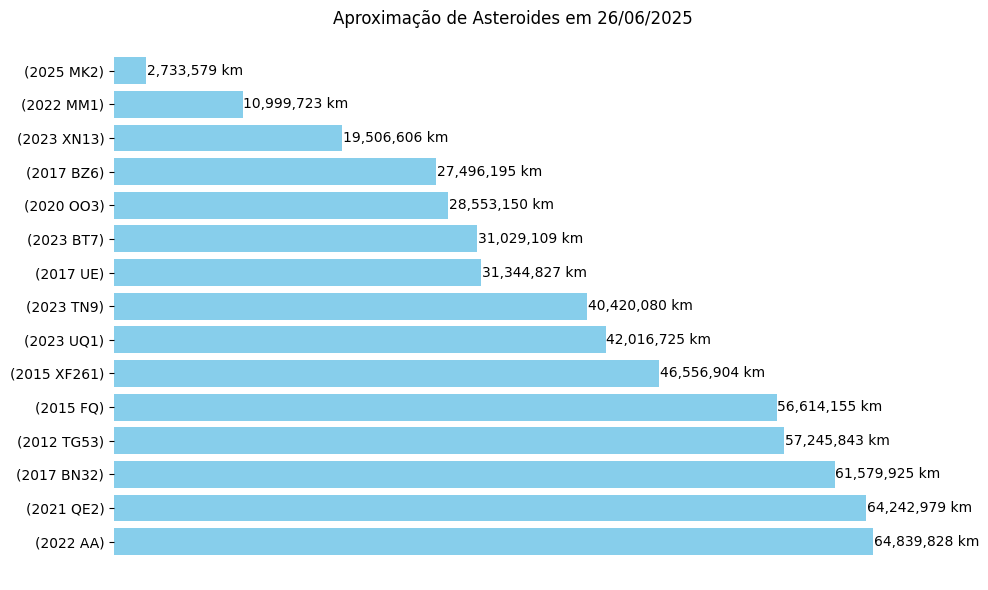

In [ ]:
import requests
import matplotlib.pyplot as plt

api_key = os.environ.get('API_KEY')
url = 'https://api.nasa.gov/neo/rest/v1/feed'
params = {
    'start_date': '2025-06-26',
    'end_date': '2025-06-26',
    'api_key': api_key
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    nomes = []
    distancias = []

    for date in data['near_earth_objects']:
        for neo in data['near_earth_objects'][date]:
            nome = neo['name']
            distancia_km = float(neo['close_approach_data'][0]['miss_distance']['kilometers'])
            print(f"Nome: {nome}")
            print(f"Distância da Terra: {distancia_km} km")
            print('-' * 40)
            nomes.append(nome)
            distancias.append(distancia_km)

    # Ordena os dados pela distância (mais próximo primeiro)
    nomes, distancias = zip(*sorted(zip(nomes, distancias), key=lambda x: x[1]))

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    bars = plt.barh(nomes, distancias, color='skyblue')
    plt.xticks([])
    #plt.xlabel('Distância da Terra (km)')
    plt.title('Aproximação de Asteroides em 26/06/2025')
    plt.gca().invert_yaxis()  # Opcional: mostra o mais próximo no topo

    for bar, distancia in zip(bars, distancias):
      plt.text(bar.get_width() + 50000,  # Deslocamento horizontal para não sobrepor a barra
              bar.get_y() + bar.get_height()/2,
              f'{distancia:,.0f} km',
              va='center')

    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.show()

else:
    print(f"Erro na requisição: {response.status_code}")
